In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [2]:
# %load_ext autoreload
# %autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/Users/savare/DeepLearning/',dataset='eeg')

Reading data from /Users/savare/DeepLearning/EEG//
Reading data from /Users/savare/DeepLearning/EEG//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//data//
Reading data from /Users/savare/DeepLearning/EEG//stefano//
Reading data from /Users/savare/DeepLearning/EEG//stefano//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//stefano//notebook//
Reading data from /Users/savare/DeepLearning/EEG//stored//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [8]:
train_dataset.shape

torch.Size([316, 28, 50])

In [9]:
test_dataset.shape

torch.Size([100, 28, 50])

In [10]:
mean=train_dataset.mean(0).view(1,28,50)
std=train_dataset.std(0).view(1,28,50)

In [11]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

# Training

  0%|          | 2/400 [00:00<00:21, 18.14it/s]

Dropout 0
48.0
Network:

[28, 28, 3, 1, 0, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:20<00:00, 19.88it/s]


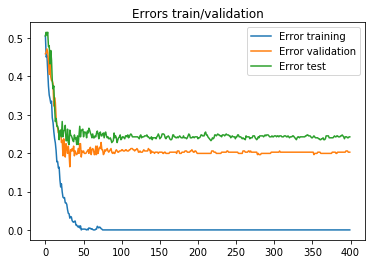

  1%|          | 3/400 [00:00<00:14, 26.92it/s]

Performance train: 0.0
Performance validation: 0.201930379747
Performance test: 0.2422
Dropout 0.1
48.0
Network:

[28, 28, 3, 1, 0.1, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:23<00:00, 17.25it/s]


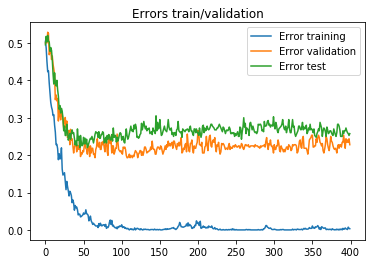

  1%|          | 3/400 [00:00<00:15, 26.08it/s]

Performance train: 0.00240506329114
Performance validation: 0.226582278481
Performance test: 0.267575
Dropout 0.2
48.0
Network:

[28, 28, 3, 1, 0.2, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:21<00:00, 18.34it/s]


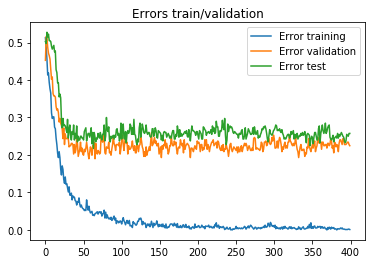

  1%|          | 3/400 [00:00<00:16, 24.34it/s]

Performance train: 0.00502109704641
Performance validation: 0.226234177215
Performance test: 0.254325
Dropout 0.3
48.0
Network:

[28, 28, 3, 1, 0.3, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:24<00:00, 16.15it/s]


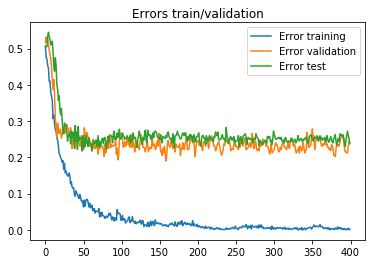

  0%|          | 2/400 [00:00<00:21, 18.73it/s]

Performance train: 0.0045253164557
Performance validation: 0.233227848101
Performance test: 0.25035
Dropout 0.4
48.0
Network:

[28, 28, 3, 1, 0.4, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:22<00:00, 17.77it/s]


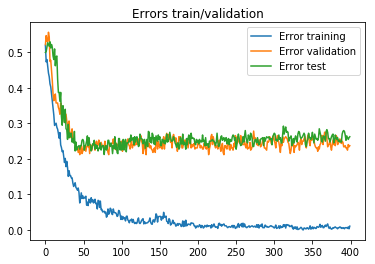

  1%|          | 3/400 [00:00<00:14, 27.33it/s]

Performance train: 0.00717299578059
Performance validation: 0.245221518987
Performance test: 0.261275
Dropout 0.5
48.0
Network:

[28, 28, 3, 1, 0.5, True]
[1344, 200]
[200, 2]

Repetition 0


 12%|█▏        | 49/400 [00:02<00:20, 17.22it/s]

In [ ]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results=[]
for dropout in dropout_values:
    print('Dropout',dropout)
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)
    
    net_type=SingleLayer
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=dropout,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=400,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [ ]:
save=False
if save:
    file_name=folder.stored+'three_layers'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                             linear_filters=[200,2],
                             dropout_rate=0.8,batch_norm=True,conv1D=True)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=300,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params,repetitions=4,cross_validation=True,repetitions_test=4)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)